In [1]:
import pandas as pd
data = pd.read_csv('pd_speech_features.csv', sep=",", header=0)
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [2]:
y = data["class"]
X = data.iloc[:,0:754]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2020)

In [4]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
def cross_validate(depth):
    cart = tree.DecisionTreeClassifier(max_depth = depth, random_state = 730087177)
    cvscore = cross_val_score(cart, X_train, y_train, cv = 5)
    print("Tree Depth of",depth, ":", cvscore.mean())
    
cross_validate(3)
cross_validate(5)
cross_validate(10)
cross_validate(15)
cross_validate(20)
for i in range(1,10,1):
    cross_validate(i)
print("Best tree depth is 6")

Tree Depth of 3 : 0.8147337369973606
Tree Depth of 5 : 0.8255239869585468
Tree Depth of 10 : 0.8096103089582364
Tree Depth of 15 : 0.8078248719142991
Tree Depth of 20 : 0.8043160999844744
Tree Depth of 1 : 0.7936811054184132
Tree Depth of 2 : 0.8147958391554105
Tree Depth of 3 : 0.8147337369973606
Tree Depth of 4 : 0.8271696941468717
Tree Depth of 5 : 0.8255239869585468
Tree Depth of 6 : 0.8360503027480206
Tree Depth of 7 : 0.8219220617916472
Tree Depth of 8 : 0.8078093463747866
Tree Depth of 9 : 0.8113181183046111
Best tree depth is 6


In [5]:
from sklearn.ensemble import AdaBoostClassifier
def boosted_cross_validate(estimators, learning):
    learnfraction = learning/10
    boosted = AdaBoostClassifier(n_estimators = estimators, learning_rate = learnfraction, random_state = 730087177)
    cvscore = cross_val_score(boosted, X_train, y_train, cv = 5)
    print("Maximum estimators of", estimators, "and learning rate of", learnfraction,":", cvscore.mean())
    return estimators, learnfraction, cvscore.mean()

maxestimator = 0;
maxlearnfraction = 0;
maxcvscore = 0;
for i in range(50, 250, 50):
    for j in range(1, 11, 1):
        iterestim, iterlearn, itercv = boosted_cross_validate(i, j)
        maxcvscore = max(maxcvscore, itercv)
        if (maxcvscore == itercv):
            maxestimator = iterestim
            maxlearnfraction = iterlearn
            
print("Best maximum estimator of", maxestimator)
print("Best learning rate of", maxlearnfraction)
print("Best cv score of", maxcvscore)


Maximum estimators of 50 and learning rate of 0.1 : 0.8483775811209439
Maximum estimators of 50 and learning rate of 0.2 : 0.8624592454587796
Maximum estimators of 50 and learning rate of 0.3 : 0.8589349479894427
Maximum estimators of 50 and learning rate of 0.4 : 0.8677224033535165
Maximum estimators of 50 and learning rate of 0.5 : 0.8624592454587796
Maximum estimators of 50 and learning rate of 0.6 : 0.8712932774413911
Maximum estimators of 50 and learning rate of 0.7 : 0.8606738084148425
Maximum estimators of 50 and learning rate of 0.8 : 0.8588107436733428
Maximum estimators of 50 and learning rate of 0.9 : 0.8466387206955442
Maximum estimators of 50 and learning rate of 1.0 : 0.8536407390156808
Maximum estimators of 100 and learning rate of 0.1 : 0.8695078403974538
Maximum estimators of 100 and learning rate of 0.2 : 0.8677224033535165
Maximum estimators of 100 and learning rate of 0.3 : 0.8800496817264399
Maximum estimators of 100 and learning rate of 0.4 : 0.8854059928582518
Ma

In [6]:
print("Maximum estimators of 200 and learning rate of 0.4 : 0.8977332712311753")

Maximum estimators of 200 and learning rate of 0.4 : 0.8977332712311753


In [7]:
print("Parkinson's cases in training:", y_train.sum())
print("Non-Parkinson's cases in training:", y_train.count() - y_train.sum())
print("Total in training:", y_train.count())

Parkinson's cases in training: 424
Non-Parkinson's cases in training: 143
Total in training: 567


In [8]:
print("Parkinson's cases in testing:", y_test.sum())
print("Non-Parkinson's cases in testing:", y_test.count() - y_test.sum())
print("Total in testing:", y_test.count())

Parkinson's cases in testing: 140
Non-Parkinson's cases in testing: 49
Total in testing: 189


In [9]:
from sklearn import tree
finalcart = tree.DecisionTreeClassifier(max_depth = 6, random_state = 730087177)
finalcart = finalcart.fit(X_train, y_train)
ypred = finalcart.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, ypred))
print("Accuracy Score for decision tree:",accuracy_score(y_test, ypred))

[[ 25  24]
 [  9 131]]
Accuracy Score for decision tree: 0.8253968253968254


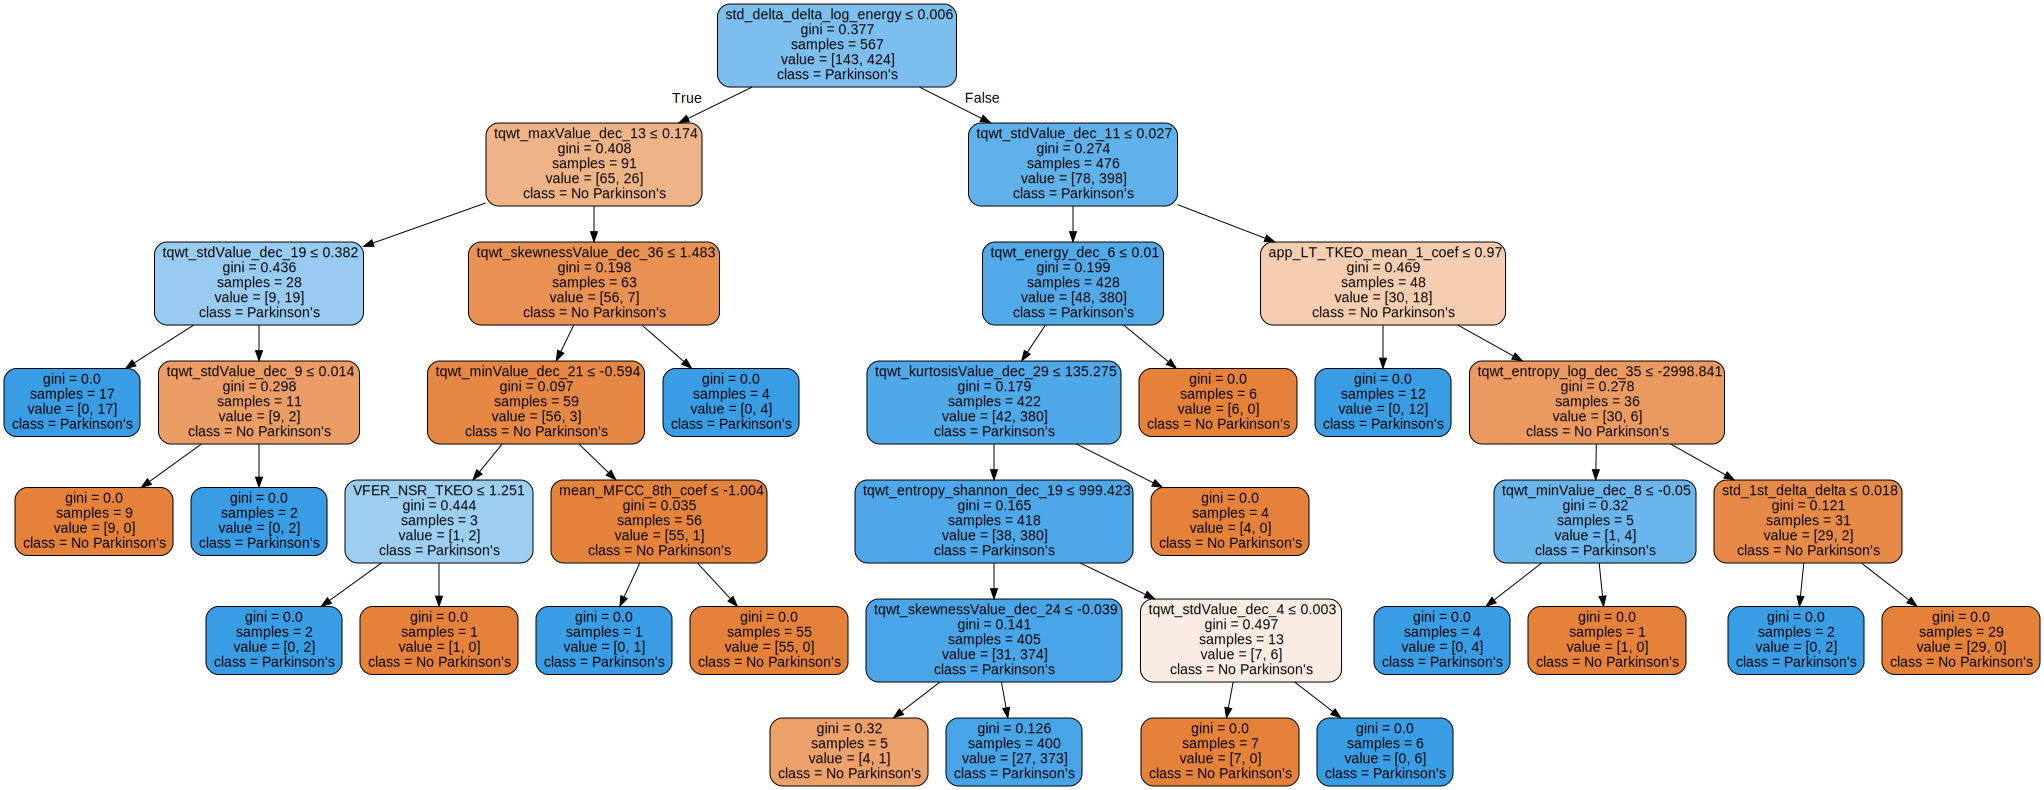

In [11]:
import graphviz
dot_data = tree.export_graphviz(finalcart, out_file=None, 
                                feature_names = X.columns, class_names = ["No Parkinson's", "Parkinson's"],
                                filled = True, rounded = True, 
                                special_characters = True) 
graph = graphviz.Source(dot_data) 
graph 

In [12]:
from sklearn.ensemble import AdaBoostClassifier
finalboosted = AdaBoostClassifier(n_estimators = 200, learning_rate = 0.4, random_state = 730087177)
finalboosted = finalboosted.fit(X_train, y_train)
ypred = finalboosted.predict(X_test)

In [13]:
print(confusion_matrix(y_test, ypred))
print("Accuracy score for boosted tree:",accuracy_score(y_test, ypred))

[[ 35  14]
 [  5 135]]
Accuracy score for boosted tree: 0.8994708994708994


In [14]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
def svm_cross_validate(Cparam):
    adjC = 10**Cparam
    cv_svm = svm.SVC(C = adjC, random_state = 730087177)
    cvscore = cross_val_score(cv_svm, X_train, y_train, cv = 5)
    print("C parameter of",adjC,":", cvscore.mean())
    return adjC, cvscore.mean()

maxC = 0;
maxcvscore = 0;
for i in range(0, 5, 1):
    iterC, itercv = svm_cross_validate(i)
    maxcvscore = max(maxcvscore, itercv)
    if (maxcvscore == itercv):
        maxC = iterC
            
print("Best C parameter of", maxC)
print("Best cv score of", maxcvscore)

C parameter of 1 : 0.7478341872380064
C parameter of 10 : 0.7548672566371681
C parameter of 100 : 0.7584070796460176
C parameter of 1000 : 0.7619469026548672
C parameter of 10000 : 0.754898307716193
Best C parameter of 1000
Best cv score of 0.7619469026548672


In [15]:
from sklearn import svm
finalsvm = svm.SVC(C = 1000, random_state = 730087177)
finalsvm.fit(X_train, y_train)
ypred = finalsvm.predict(X_test)

In [16]:
print(confusion_matrix(y_test, ypred))
print("Accuracy score for svm:",accuracy_score(y_test, ypred))

[[  9  40]
 [  6 134]]
Accuracy score for svm: 0.7566137566137566


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
def gb_cross_validate(estimators, learning):
    learnfraction = learning/10
    gboost = GradientBoostingClassifier(n_estimators = estimators, learning_rate = learnfraction, random_state = 730087177)
    cvscore = cross_val_score(gboost, X_train, y_train, cv = 5)
    print("Maximum estimators of", estimators, "and learning rate of", learnfraction,":", cvscore.mean())
    return estimators, learnfraction, cvscore.mean()

maxestimator = 0;
maxlearnfraction = 0;
maxcvscore = 0;
for i in range(50, 250, 50):
    for j in range(1, 11, 1):
        iterestim, iterlearn, itercv = gb_cross_validate(i, j)
        maxcvscore = max(maxcvscore, itercv)
        if (maxcvscore == itercv):
            maxestimator = iterestim
            maxlearnfraction = iterlearn
            
print("Best maximum estimator of", maxestimator)
print("Best learning rate of", maxlearnfraction)
print("Best cv score of", maxcvscore)


Maximum estimators of 50 and learning rate of 0.1 : 0.8589194224499301
Maximum estimators of 50 and learning rate of 0.2 : 0.8571805620245303
Maximum estimators of 50 and learning rate of 0.3 : 0.8536407390156808
Maximum estimators of 50 and learning rate of 0.4 : 0.8518708275112561
Maximum estimators of 50 and learning rate of 0.5 : 0.8677534544325416
Maximum estimators of 50 and learning rate of 0.6 : 0.8677534544325415
Maximum estimators of 50 and learning rate of 0.7 : 0.8377270610153703
Maximum estimators of 50 and learning rate of 0.8 : 0.8376960099363453
Maximum estimators of 50 and learning rate of 0.9 : 0.823629871138022
Maximum estimators of 50 and learning rate of 1.0 : 0.8253532060239094
Maximum estimators of 100 and learning rate of 0.1 : 0.8642446825027168
Maximum estimators of 100 and learning rate of 0.2 : 0.8765564353361279
Maximum estimators of 100 and learning rate of 0.3 : 0.8607203850333798
Maximum estimators of 100 and learning rate of 0.4 : 0.8659835429281169
Max

In [18]:
finalgboost = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.2, random_state = 730087177)
finalgboost.fit(X_train, y_train)
ypred = finalgboost.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test, ypred))
print("Accuracy score for gradient boosting:",accuracy_score(y_test, ypred))

[[ 32  17]
 [  4 136]]
Accuracy score for gradient boosting: 0.8888888888888888
